In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
movies=pd.read_csv(r'C:\Users\dheer\Downloads\tmdb_5000_movies.csv\tmdb_5000_movies.csv')
credits=pd.read_csv(r'C:\Users\dheer\Downloads\tmdb_5000_movies.csv\tmdb_5000_credits.csv')
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [3]:
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [4]:
final_data=pd.merge(credits,movies,how='inner',left_on=['title','movie_id'],right_on=['title','id'])
final_data.drop(columns=['id'],inplace=True)
final_data

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",6.6,238
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,Newlyweds,...,[],

In [5]:
C=final_data.vote_average.mean()
C

6.092171559442011

In [6]:
m=final_data.vote_count.quantile(0.80)
m

957.6000000000004

In [7]:
df=final_data.copy()
df=df[df['vote_count']>=m]
df

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577,23827,Paranormal Activity,"[{""cast_id"": 3, ""character"": ""Katie"", ""credit_...","[{""credit_id"": ""52fe4477c3a368484e024b01"", ""de...",15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.paranormalactivity-movie.com/,"[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...",en,Paranormal Activity,...,"[{""name"": ""Blumhouse Productions"", ""id"": 3172}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-09-14,193355800,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What Happens When You Sleep?,5.9,1316
4579,762,Monty Python and the Holy Grail,"[{""cast_id"": 11, ""character"": ""King Arthur / V...","[{""credit_id"": ""52fe4272c3a36847f801f66f"", ""de...",400000,"[{""id"": 12, ""name"": ""Adv

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [9]:
df['weighted_ratings']=df.apply(weighted_rating,axis=1)
df

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,weighted_ratings
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,7.116845
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,6.758257
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,6.263305
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,7.456523
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,6.097567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4577,23827,Paranormal Activity,"[{""cast_id"": 3, ""character"": ""Katie"", ""credit_...","[{""credit_id"": ""52fe4477c3a368484e024b01"", ""de...",15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.paranormalactivity-movie.com/,"[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...",en,Paranormal Activity,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-09-14,193355800,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What Happens When You Sleep?,5.9,1316,5.980939
4579,762,Monty Python and the Holy Grail,"[{""cast_id"": 11, ""character"": ""King Arthur / V...","[{""credit_id"": ""52fe4272c3a36847f801f66f"", ""de...",400000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",http://www.sonypictures.com/cthe/montypython/,"[{""id"": 113, ""name"": ""holy grail""}, {""id"": 345...",en,Monty Python and the Holy Grail,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",1975-03-13,5028948,91.0,"[{""iso_639_1"": ""fr"", ""name"": 

In [10]:
df.sort_values('weighted_ratings', ascending=False,inplace=True)
df

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,weighted_ratings
1881,278,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,8.5,8205,8.248353
662,550,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,...,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,8.3,9413,8.096134
3337,238,The Godfather,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",http://www.thegodfather.com/,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,The Godfather,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,8.4,5893,8.077404
3232,680,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,8.3,8428,8.074738
65,155,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,8.2,12002,8.044250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,82700,After Earth,"[{""cast_id"": 11, ""character"": ""Kitai Raige"", ""...","[{""credit_id"": ""52fe486f9251416c9108c631"", ""de...",130000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,"[{""id"": 4565, ""name"": ""dystopia""}]",en,After Earth,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-05-30,243843127,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Danger is real, fear is a choice",5.0,2532,5.299709
91,47933,Independence Day: Resurgence,"[{""cast_id"": 5, ""character"": ""Jake Morrison"", ...","[{""credit_id"": ""5763d39cc3a36860a5000168"", ""de...",165000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.warof1996.com,"[{""id"": 12026, ""name"": ""alternate history""}, {...",en,Independence Day: Resurgence,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-06-22,389681935,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,We had twenty years to prepare. So did they.,4.9,2491,5.231040
3746,241251,The Boy Next Door,"[{""cast_id"": 3, ""character"": ""Claire Peterson""

In [11]:
df=df.drop(columns=['movie_id','homepage','original_title'])
df.reset_index(drop=True,inplace=True)

In [12]:
subset=df.sort_values('popularity',ascending=False)[:5]
subset

,title,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,weighted_ratings
599,Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...","[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-17,1156730962,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",6.4,4571,6.346682
7,Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",2014-11-05,675120017,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,8.1,10867,7.937399
113,Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-09,783112979,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,7.4,10995,7.295221
22,Guardians of the Galaxy,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...","[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2014-07-30,773328629,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,7.9,9742,7.738202
170,Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-05-13,378858340,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,7.2,9427,7.097843


<AxesSubplot:xlabel='popularity', ylabel='title'>

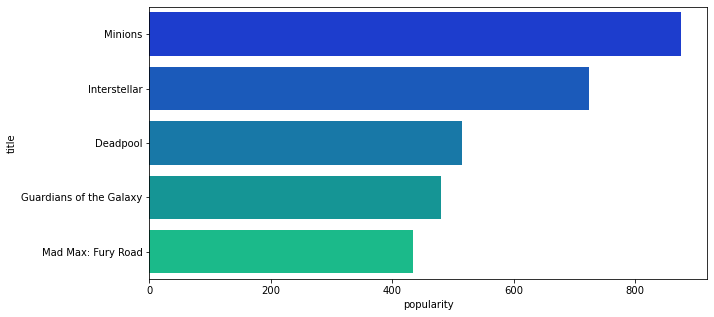

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='popularity',y='title',data=subset,palette='winter')

In [14]:
#content-based_filtering
tfidf = TfidfVectorizer(stop_words='english')
df['overview'].fillna('',inplace=True)
tfidf_matrix = tfidf.fit_transform(df['overview'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.00665606, 0.00600631, ..., 0.        , 0.00621806,
        0.02814385],
       [0.00665606, 1.        , 0.        , ..., 0.        , 0.00707558,
        0.08264966],
       [0.00600631, 0.        , 1.        , ..., 0.        , 0.03519554,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.03432423],
       [0.00621806, 0.00707558, 0.03519554, ..., 0.        , 1.        ,
        0.00873434],
       [0.02814385, 0.08264966, 0.        , ..., 0.03432423, 0.00873434,
        1.        ]])

In [15]:
cosine_sim.shape

(961, 961)

In [16]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices

title
The Shawshank Redemption          0
Fight Club                        1
The Godfather                     2
Pulp Fiction                      3
The Dark Knight                   4
                               ... 
After Earth                     956
Independence Day: Resurgence    957
The Boy Next Door               958
Batman & Robin                  959
Fantastic Four                  960
Length: 961, dtype: int64

In [17]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [18]:
get_recommendations('Fight Club')

602                                Project X
297                          The Hurt Locker
960                           Fantastic Four
819              Austin Powers in Goldmember
763    The Fast and the Furious: Tokyo Drift
263                          Sherlock Holmes
885                                   Parker
344                     The Devil's Advocate
527                                    Rango
865        A Million Ways to Die in the West
Name: title, dtype: object

In [19]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [20]:
def director(x):
    for i in x:
        if i['job']=='Director':
            return i['name']
    return np.nan


In [21]:
df['director']=df['crew'].apply(director)
df

,title,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,weighted_ratings,director
0,The Shawshank Redemption,"[{'cast_id': 3, 'character': 'Andy Dufresne', ...","[{'credit_id': '52fe4231c3a36847f800b153', 'de...",25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",en,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,1994-09-23,28341469,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,8.5,8205,8.248353,Frank Darabont
1,Fight Club,"[{'cast_id': 4, 'character': 'The Narrator', '...","[{'credit_id': '55731b8192514111610027d7', 'de...",63000000,"[{'id': 18, 'name': 'Drama'}]","[{'id': 825, 'name': 'support group'}, {'id': ...",en,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,1999-10-15,100853753,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,8.3,9413,8.096134,David Fincher
2,The Godfather,"[{'cast_id': 5, 'character': 'Don Vito Corleon...","[{'credit_id': '52fe422bc3a36847f80093c9', 'de...",6000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...","[{'id': 131, 'name': 'italy'}, {'id': 699, 'na...",en,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,1972-03-14,245066411,175.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An offer you can't refuse.,8.4,5893,8.077404,Francis Ford Coppola
3,Pulp Fiction,"[{'cast_id': 2, 'character': 'Vincent Vega', '...","[{'credit_id': '52fe4269c3a36847f801caa3', 'de...",8000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...","[{'id': 396, 'name': 'transporter'}, {'id': 14...",en,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,1994-10-08,213928762,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,8.3,8428,8.074738,Quentin Tarantino
4,The Dark Knight,"[{'cast_id': 35, 'character': 'Bruce Wayne', '...","[{'credit_id': '55a0eb4a925141296b0010f8', 'de...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,2008-07-16,1004558444,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,8.2,12002,8.044250,Christopher Nolan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,After Earth,"[{'cast_id': 11, 'character': 'Kitai Raige', '...","[{'credit_id': '52fe486f9251416c9108c631', 'de...",130000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...","[{'id': 4565, 'name': 'dystopia'}]",en,One thousand years after cataclysmic events fo...,42.840582,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2013-05-30,243843127,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Danger is real, fear is a choice",5.0,2532,5.299709,M. Night Shyamalan
957,Independence Day: Resurgence,"[{'cast_id': 5, 'character': 'Jake Morrison', ...","[{'credit_id': '5763d39cc3a36860a5000168', 'de...",165000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12026, 'name': 'alternate history'}, {...",en,We always knew they were coming back. Using re...,48.775723,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,2016-06-22,389681935,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,We had twenty years to prepare. So did they.,4.9,2491,5.231040,Roland Emmerich
958,The Boy Next Door,"[{'cast_id': 3, 'character': '

In [22]:
def get_list(x):
    if (x):
        names=[i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
    

In [23]:
features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)


In [24]:
def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    elif isinstance(x,str):
        return str.lower(x.replace(" ",""))
    else:
        return np.nan


In [25]:
features = ['cast', 'keywords', 'genres','director']
for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [26]:
def combined_text(x):
    return ' '.join(x['cast']) + ' '.join(x['keywords']) +' '.join(x['genres']) + ' '.join(x['director'])
df['movie_details']=df.apply(combined_text,axis=1)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['movie_details'])

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [29]:
df = df.reset_index()
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
indices

title
The Shawshank Redemption          0
Fight Club                        1
The Godfather                     2
Pulp Fiction                      3
The Dark Knight                   4
                               ... 
After Earth                     956
Independence Day: Resurgence    957
The Boy Next Door               958
Batman & Robin                  959
Fantastic Four                  960
Length: 961, dtype: int64

In [34]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

97          Batman Begins
4         The Dark Knight
210          Mystic River
609        Public Enemies
331           The Fighter
452          3:10 to Yuma
217         The Big Short
407       American Hustle
34           The Prestige
37     The Usual Suspects
Name: title, dtype: object

In [32]:
get_recommendations('The Godfather', cosine_sim2)

16       The Godfather: Part II
0      The Shawshank Redemption
75                  City of God
79               Apocalypse Now
537             The Italian Job
17               The Green Mile
52                     Scarface
136         Edward Scissorhands
308               Donnie Brasco
344        The Devil's Advocate
Name: title, dtype: object